## Project Overview- Gradient Descent
**Data Used:** The dataset, "Real-estate-dataset.csv, contains information about house prices based on features, X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude X6 longitude.

**Process Undertaken:**

Data Cleaning: No missing values in dataset and all data is numeric and hence no tranformations are applied.

Model Training and Evaluation: A Gradient Descent model was trained on the dataset. The model's performance was evaluated using Theta, R Squareded, RMSE, RSE and the plot used are actual vs predicted prices and residual plot etc

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = '//content/drive/MyDrive/INDE 577 github Jupyter files/Supervised Learning/Gradient Descent/Real-estate-dataset.csv'
housing_df = pd.read_csv(file_path)

# Data Cleaning
# Remove rows based on specific conditions
#conditions = [
 #   (housing_df['bedrooms'] == 33) & (housing_df['bathrooms'] == 1.75),
#  (housing_df['bedrooms'] == 0) & (housing_df['price'] == 1095000),
#    (housing_df['bedrooms'] == 0) & (housing_df['price'] == 380000),
#    (housing_df['bedrooms'] == 33) & (housing_df['area'] == 1620),
#    (housing_df['area'] > 1000000) & (housing_df['bathrooms'] == 1)
#]
#for condition in conditions:
#    housing_df = housing_df.drop(housing_df[condition].index)

# Drop top 1% of the data from the 'price' column
rows_to_drop = int(len(housing_df) * 0.01)
housing_df = housing_df.sort_values('price', ascending=False).iloc[rows_to_drop:]

# Convert categorical 'yes'/'no' columns to numeric
#categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
#for col in categorical_cols:
 #   le = LabelEncoder()
  #  housing_df[col] = le.fit_transform(housing_df[col])

# Applying one-hot encoding to the 'furnishingstatus' column
#housing_df = pd.get_dummies(housing_df, columns=['furnishingstatus'], drop_first=True)

# Extract the features (X) and target variable (y)
X = housing_df.drop('price', axis=1).values
y = housing_df['price'].values

##Data Loading and Preprocessing Summary

- Imported necessary libraries for data handling and preprocessing (pandas, numpy, StandardScaler, LabelEncoder).

- Loaded the real-estate dataset from Google Drive into a pandas DataFrame.

- Removed the top 1% of rows based on price to eliminate extreme outliers and reduce skew in the dataset.

- Included (but commented out) optional cleaning steps to drop rows with unrealistic bedroom/bathroom combinations.

- Included (but commented out) categorical preprocessing steps such as encoding yes/no variables and applying one-hot encoding to the furnishing status column.

- Separated the dataset into features (X) and the target variable (y) to prepare for model training.

In [ ]:
# Normalize the data
sc_X = StandardScaler()
X_normalized = sc_X.fit_transform(X)
X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized)) # Add intercept term

sc_y = StandardScaler()
y_normalized = np.ravel(sc_y.fit_transform(y.reshape(-1, 1)))

# Gradient Descent Functions
def compute_cost(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

def gradient_function(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    grad = (1 / m) * X.T.dot(h - y)
    return grad

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    grad_magnitude_history = []

    for i in range(iterations):
        gradient = gradient_function(X, y, theta)
        grad_magnitude = np.linalg.norm(gradient)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        grad_magnitude_history.append(grad_magnitude)

    return theta, cost_history, grad_magnitude_history

# Model Training
alpha = 0.01
iterations = 1000
theta = np.zeros(X_normalized.shape[1])

theta_final, cost_history, grad_magnitude_history = gradient_descent(X_normalized, y_normalized, theta, alpha, iterations)

# Print final parameters (optional)
print("Final parameters:", theta_final)

Final parameters: [ 1.10780360e-13 -4.66192342e-02  8.02976910e-02 -2.49318474e-01
 -3.60602941e-01  2.78459664e-01  2.32239822e-01  3.90414848e-02]


##Cost Function Visualization

Plots the cost_history values generated during gradient descent.

Displays how the cost decreases over iterations, helping evaluate convergence.

Includes labeled axes and a title for clear interpretation of the model’s optimization progress.

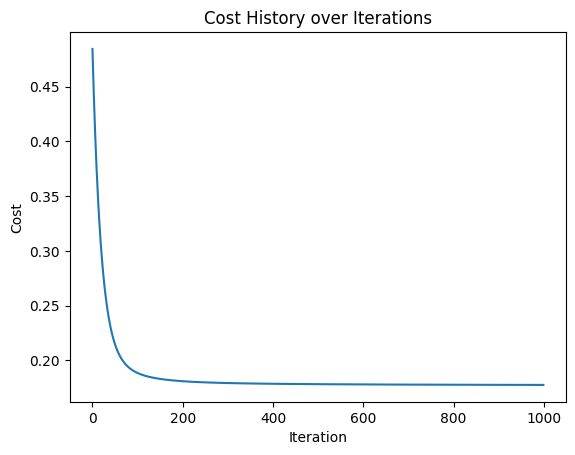

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History over Iterations')
plt.show()


##Model Evaluation Summary

- Generates predictions using the normalized feature matrix and the final optimized parameters.

- Converts the normalized predictions back to the original price scale using the inverse transformation of the target scaler.

- Computes key evaluation metrics:

- Mean Squared Error (MSE): average squared difference between actual and predicted prices.

- Root Mean Squared Error (RMSE): square root of MSE, representing error in original units.

- R-squared: proportion of variance in the target variable explained by the model.

- Prints all evaluation results to assess model accuracy and performance.

In [ ]:
# Calculate predictions on the normalized features
y_pred_normalized = X_normalized.dot(theta_final)

# Rescale the predictions back to the original scale
y_pred = sc_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared:", r_squared)




Mean Squared Error: 56.7760156220555
Root Mean Squared Error: 7.534986106294789
R-squared: 0.6448723788935375


##Prediction and Residual Analysis

- Two visualization functions are defined to evaluate model performance.

- The Actual vs Predicted Prices plot shows how closely the model's predictions align with true values, using a scatter plot with a reference line for perfect prediction.

- The Residual Plot visualizes the difference between actual and predicted values, helping detect bias or non-random error patterns.

- Scatter transparency is added for better visibility, and each plot includes titles, axis labels, gridlines, and a legend.

- Both plots are generated using the actual prices (y) and the model’s predictions (y_pred) to assess prediction accuracy and diagnostic patterns.




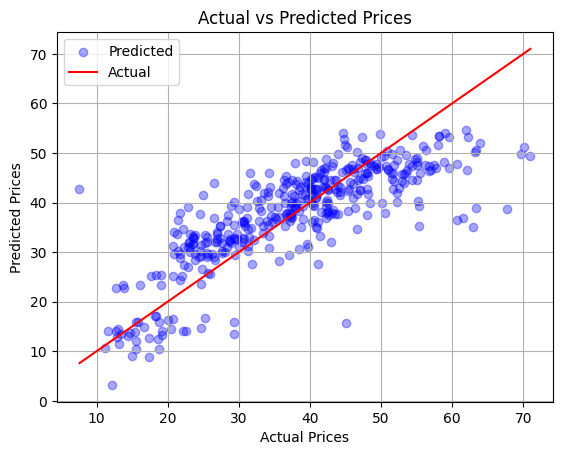

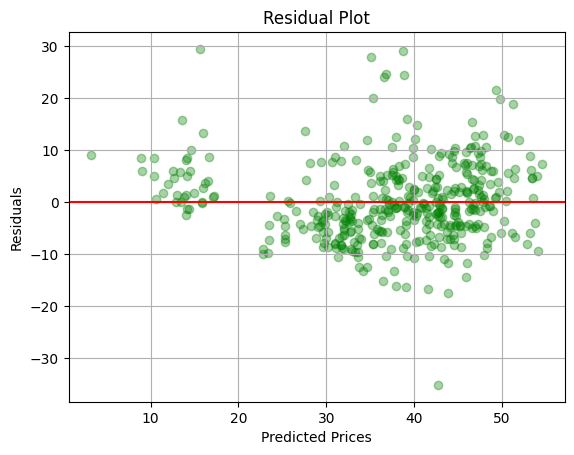

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred):
    """
    Plots the actual vs predicted values.
    """
    plt.scatter(y_test, y_pred, color='blue', alpha=0.35, label='Predicted')   # transparency added
    plt.plot(y_test, y_test, color='red', label='Actual')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Prices")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_residuals(y_test, y_pred):
    """
    Plots the residuals of the model.
    """
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, color='green', alpha=0.35)   # transparency added
    plt.axhline(y=0, color='red', linestyle='-')
    plt.title("Residual Plot")
    plt.xlabel("Predicted Prices")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()


# Assuming y is your actual data and y_pred is the predictions from your model
plot_predictions(y, y_pred)
plot_residuals(y, y_pred)

##Gradient Magnitude Visualization

- Checks whether grad_magnitude_history contains recorded values before plotting.

- Plots the gradient magnitude across iterations using both a smooth line and semi-transparent scatter points for visual clarity.

- This plot helps illustrate how the gradient decreases as gradient descent progresses, indicating whether the algorithm is converging.

- Includes labeled axes, a title, gridlines, and a legend for better interpretation.

- Prints a message if no gradient history is available.

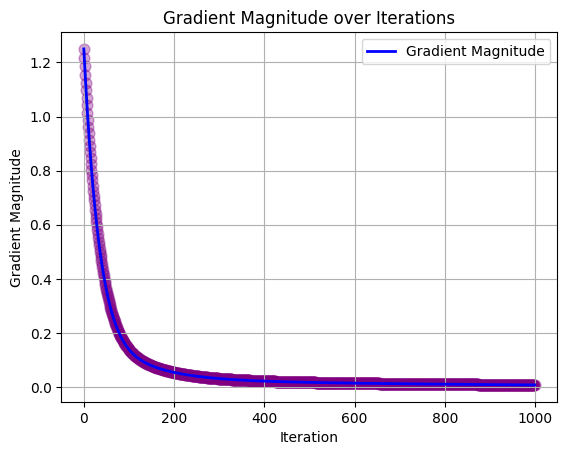

In [ ]:
import matplotlib.pyplot as plt

# Check if grad_magnitude_history is not empty
if grad_magnitude_history:
    iterations = range(len(grad_magnitude_history))

    # Solid line
    plt.plot(iterations, grad_magnitude_history, color='b', linewidth=2, label="Gradient Magnitude")

    # Transparent dots
    plt.scatter(iterations, grad_magnitude_history, color='purple', alpha=0.35, s=60)

    plt.xlabel('Iteration')
    plt.ylabel('Gradient Magnitude')
    plt.title('Gradient Magnitude over Iterations')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("The grad_magnitude_history list is empty.")


##Final Conclusion

The complete workflow successfully implemented gradient descent to model housing prices, beginning with thorough data loading, cleaning, preprocessing, and normalization. The optimization process was monitored using cost history and gradient magnitude plots, both confirming stable convergence over iterations. After rescaling predictions back to the original price range, key evaluation metrics—including MSE, RMSE, and R²—demonstrated how effectively the model captures relationships within the dataset. Additional diagnostic plots, such as the actual vs. predicted values and residual analysis, further validated the model’s performance and highlighted areas for potential refinement. Overall, the gradient descent approach produced a reliable predictive model, offering clear insights into its accuracy, error patterns, and optimization behavior.